In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train_features = pd.read_csv("Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv")
train_features["Count"] = 1
train_labels = pd.read_csv("Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv")
train = pd.merge(train_features,train_labels,on="id",how="outer")
test = pd.read_csv("Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv")

In [8]:
test["date_recorded"] = pd.to_datetime(test.date_recorded)
train["date_recorded"] = pd.to_datetime(train.date_recorded)

Is there temporal separation of test and training datasets?

In [4]:
test["date_recorded"].describe()

count                   14850
unique                    331
top       2013-02-03 00:00:00
freq                      138
first     2001-03-26 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [5]:
train.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

How many times does each well appear in the dataset?

In [67]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Count,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,functional


In [68]:
train["Coordinates"] = train.latitude.astype(str) +","+ train.longitude.astype(str)

In [69]:
coord_counts = train.groupby("Coordinates").count()["Count"].reset_index()
coord_counts.sort_values("Count",ascending=False)

,Coordinates,Count
13127,"-2e-08,0.0",1812
41880,"-6.98360619,39.09837398",2
41863,"-6.98188419,39.09206155",2
42392,"-7.0939143,37.23632569",2
41856,"-6.9813255,39.10124424",2
10385,"-2.52871573,32.9727187",2
10034,"-2.48708461,33.01559667",2
41705,"-6.96247516,37.53277831",2
42399,"-7.09513079,37.28135697",2
10141,"-2.50162744,32.95559708",2


Each well seems to appear at most two times, but there are 1812 cases where the coordinates are missing.

How many distinct areas are there?

In [70]:
populations = train[["region_code","district_code","subvillage","population"]].drop_duplicates()
populations.head()

,region_code,district_code,subvillage,population
0,11,5,Mnyusi B,109
1,20,2,Nyamara,280
2,21,4,Majengo,250
3,90,63,Mahakamani,58
4,18,1,Kyanyamisa,0


How many people use each well?

In [71]:
well_counts = train.groupby(["region_code","district_code","subvillage"]).count()["Count"].reset_index()
well_counts.columns = ["region_code","district_code","subvillage","WellCountInSubvillage"]
train = train.merge(well_counts,on=["region_code","district_code","subvillage"],how="outer")
train["UsersPerWellInSubvillage"] = train.population / train.WellCountInSubvillage
train[["region_code","district_code","subvillage","WellCountInSubvillage","UsersPerWellInSubvillage"]].describe()

/home/james/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,region_code,district_code,WellCountInSubvillage,UsersPerWellInSubvillage
count,59400.000000,59400.000000,59029.000000,59029.000000
mean,15.297003,5.629747,6.870267,80.185518
std,17.587406,9.633649,15.617903,306.183973
min,1.000000,0.000000,1.000000,0.000000
25%,5.000000,2.000000,NaN,NaN
50%,12.000000,3.000000,NaN,NaN
75%,17.000000,5.000000,NaN,NaN
max,99.000000,80.000000,187.000000,30500.000000


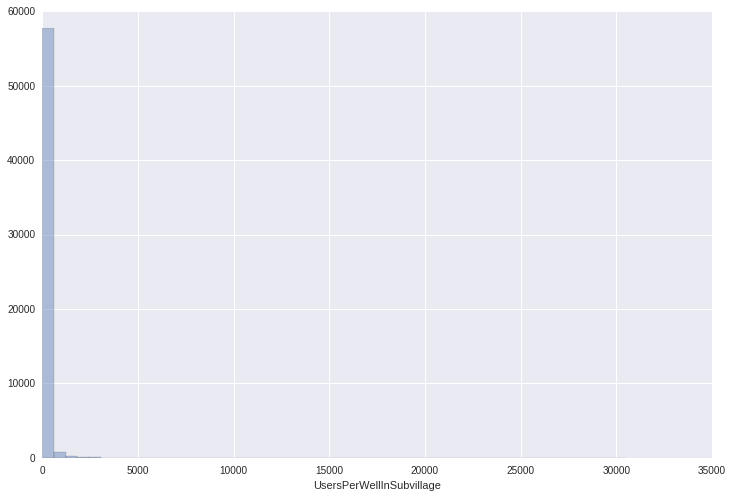

In [72]:
plt.figure(figsize=(12,8))
sns.distplot(train.UsersPerWellInSubvillage.dropna(),kde=False)

What are the properties of the wells?

In [73]:
train.extraction_type.unique()

array(['gravity', 'mono', 'submersible', 'nira/tanira', 'other',
       'india mark ii', 'swn 80', 'other - rope pump', 'ksb', 'windmill',
       'afridev', 'other - swn 81', 'india mark iii', 'walimi',
       'other - play pump', 'cemo', 'climax', 'other - mkulima/shinyanga'], dtype=object)

In [74]:
train.extraction_type_group.unique()

array(['gravity', 'mono', 'submersible', 'nira/tanira', 'other',
       'india mark ii', 'swn 80', 'rope pump', 'wind-powered', 'afridev',
       'other handpump', 'india mark iii', 'other motorpump'], dtype=object)

In [75]:
train.extraction_type_class.unique()

array(['gravity', 'motorpump', 'submersible', 'handpump', 'other',
       'rope pump', 'wind-powered'], dtype=object)

In [76]:
train.extraction_type.isnull().values.any()

False

In [77]:
train.extraction_type_class.isnull().values.any()

False

The well extraction types are all fully annotated.

In [78]:
print(train.waterpoint_type.unique())
train.waterpoint_type.isnull().values.any()

['communal standpipe' 'communal standpipe multiple' 'other' 'hand pump'
 'improved spring' 'cattle trough' 'dam']


False

In [79]:
print(train.waterpoint_type_group.unique())
train.waterpoint_type_group.isnull().values.any()

['communal standpipe' 'other' 'hand pump' 'improved spring' 'cattle trough'
 'dam']


False

In [80]:
train[train.waterpoint_type != train.waterpoint_type_group]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Count,status_group,Coordinates,WellCountInSubvillage,UsersPerWellInSubvillage
7,45674,0.0,2013-03-06,Government Of Tanzania,1399,Government,34.698453,-2.146846e+00,Zahanati,0,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,functional,"-2.14684612,34.69845301",5.0,56.000000
11,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,dam,dam,surface,communal standpipe multiple,communal standpipe,1,functional,"-3.82132853,37.46066446",1.0,250.000000
12,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,non functional,"-11.15529772,38.48616088",5.0,11.600000
13,73159,0.0,2013-01-28,Unicef,274,UNICEF,38.487294,-1.115211e+01,Kwa Yusuph Namoyo,0,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,non functional,"-11.15210889,38.48729389",5.0,22.000000
19,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,other,other,unknown,communal standpipe multiple,communal standpipe,1,functional,"-4.76558728,39.1727956",1.0,1.000000
72,31691,0.0,2011-07-24,Government Of Tanzania,1205,RWE,32.902555,-2.000794e+00,Kwaselemani,0,...,lake,river/lake,surface,communal standpipe multiple,communal standpipe,1,non functional,"-2.00079371,32.90255504",9.0,38.888889
73,48095,0.0,2011-07-29,Government Of Tanzania,1198,RWE,33.039238,-2.015272e+00,Market,0,...,lake,river/lake,surface,communal standpipe multiple,communal standpipe,1,non functional,"-2.0152722,33.03923808",9.0,111.111111
74,46178,0.0,2011-07-29,Government Of Tanzania,1194,RWE,33.040418,-2.014831e+00,Center,0,...,lake,river/lake,surface,communal standpipe multiple,communal standpipe,1,non functional,"-2.01483132,33.04041759",9.0,33.333333
75,10365,0.0,2011-07-23,Government Of Tanzania,1186,RWE,32.929963,-1.963493e+00,Center,0,...,lake,river/lake,surface,communal standpipe multiple,communal standpipe,1,non functional,"-1.96349281,32.92996326",9.0,66.666667
76,1776,0.0,2011-08-08,Government Of Tanzania,1142,DWE,33.020216,-1.872513e+00,none,0,...,lake,river/lake,surface,communal standpipe multiple,communal standpipe,1,non functional,"-1.87251316,33.02021552",9.0,50.000000


(array([ 20709.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  38691.]),
 array([    0. ,   201.3,   402.6,   603.9,   805.2,  1006.5,  1207.8,
         1409.1,  1610.4,  1811.7,  2013. ]),
 <a list of 10 Patch objects>)

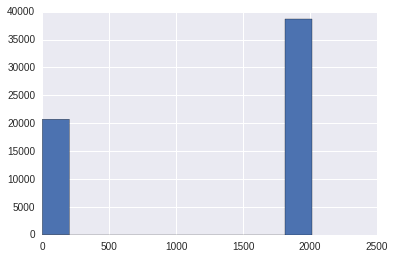

In [81]:
plt.hist(train.construction_year.values)

Many wells are missing details for their construction year.

Relationships between water qualities and quantities and pump statuses.

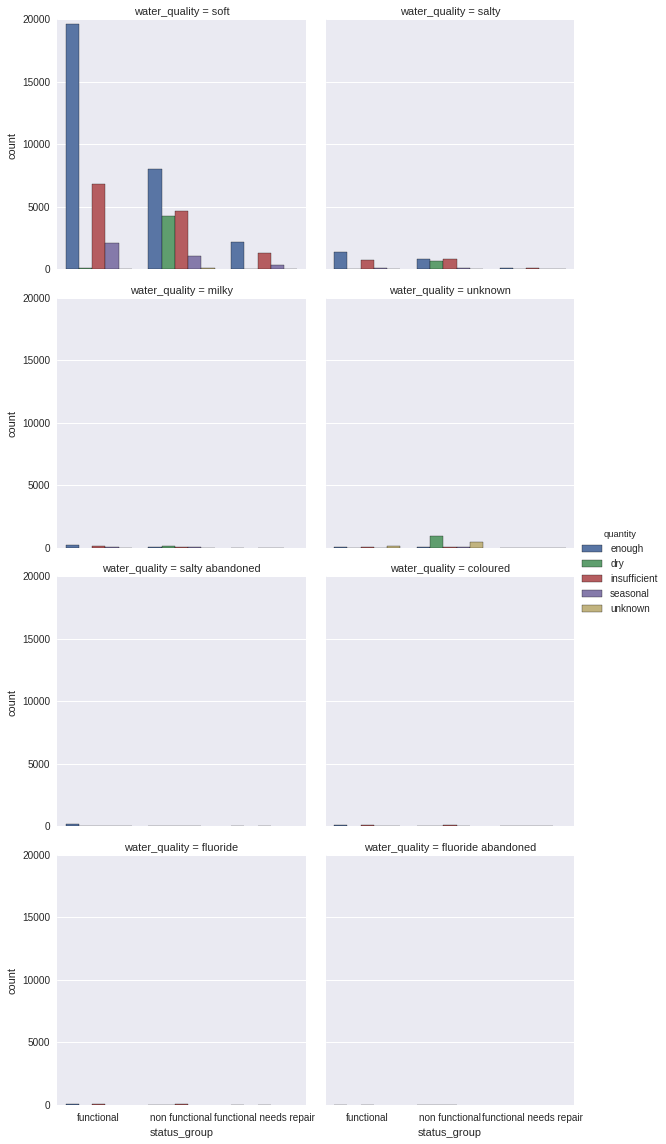

In [82]:
sns.factorplot("status_group",hue = "quantity",col = "water_quality",col_wrap=2,kind="count",data = train)

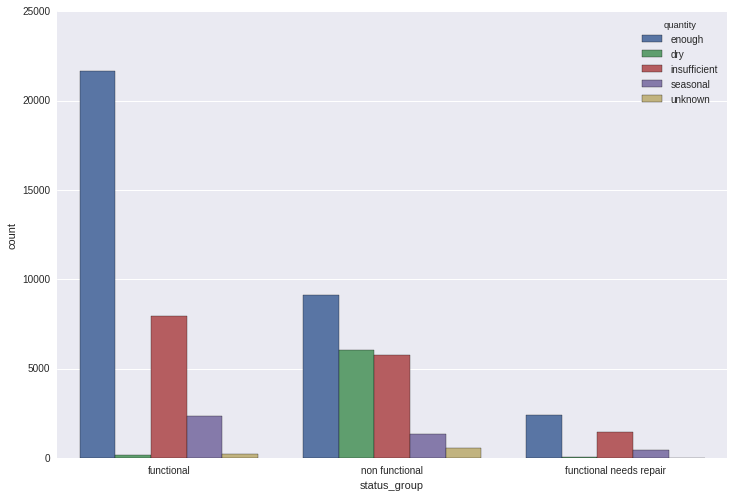

In [83]:
plt.figure(figsize=(12,8))
sns.countplot(x = "status_group",hue = "quantity",data = train)

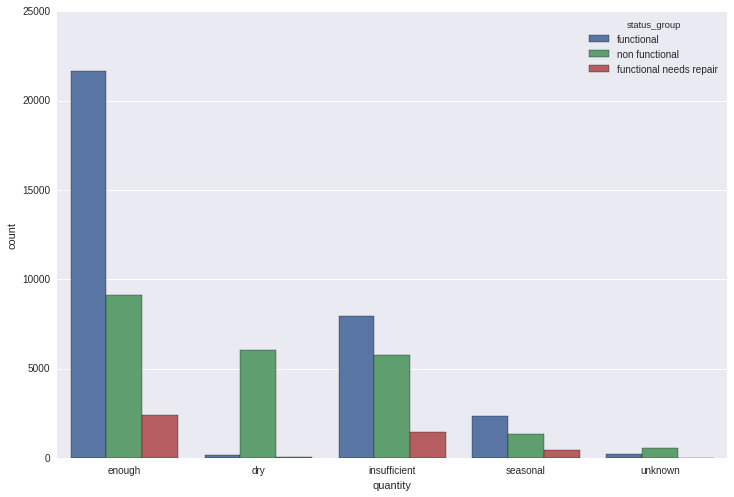

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(x = "quantity",hue = "status_group",data = train)

Distribution of Wells Geographically

In [85]:
train_sample = (train[(train.latitude != 0) & (train.longitude != 0)]).sample(n=5000)
train_sample_functional = train_sample[train_sample.status_group == "functional"]
train_sample_non_functional = train_sample[train_sample.status_group == "non functional"]
train_sample_repair = train_sample[train_sample.status_group == "functional needs repair"]

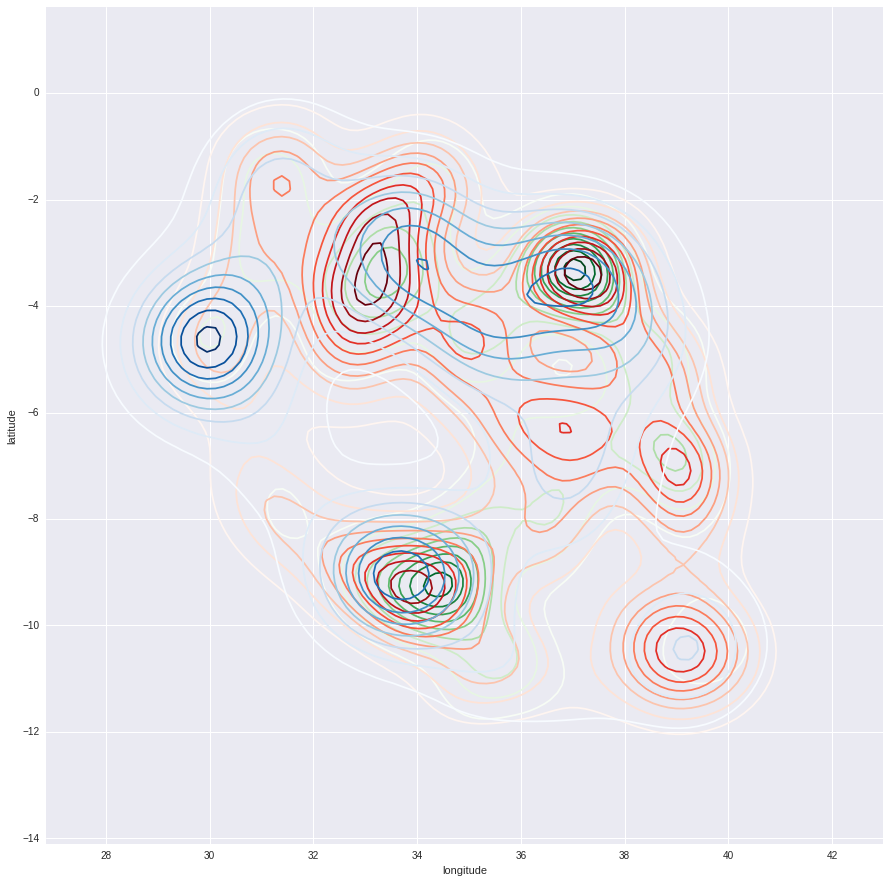

In [86]:
plt.figure(figsize=(15,15))
sns.kdeplot(train_sample_functional.longitude,train_sample_functional.latitude,shade=False,cmap="Greens")
sns.kdeplot(train_sample_non_functional.longitude,train_sample_non_functional.latitude,shade=False,cmap='Reds')
sns.kdeplot(train_sample_repair.longitude,train_sample_repair.latitude,shade=False,cmap="Blues")

What are the differences between  the various funding and management bodies?

In [87]:
def groupCountFractionals(dataframe,target,outer):
    import pandas
    import itertools
    '''
    dataframe: a pandas dataframe
    target: a string corresponding to the column of interest in the dataframe
    outer: a list of the columns by which the counts should be conditioned
    
    Returns the fraction of target_criteria_group / outer_criteria_group counts.
    
    Be mindful to take group sizes (Outer Count) into consideration. 
    As outer count gets smaller, the fraction value
    will obviously become increasingly large.
    
    '''
    dataframe["Count"] = 1
    outcome_variable = outer[0]
    inner_group_criteria = outer + [target]
    outer_counts = dataframe.groupby(outer).count()[["Count"]]
    outer_counts.columns = ["OuterCount"]
    outer_counts = outer_counts.reset_index()
    inner_counts = dataframe.groupby(inner_group_criteria).count()[["Count"]]
    inner_counts.columns = ["InnerCount"]
    inner_counts = inner_counts.reset_index()
    in_and_out =pandas.merge(inner_counts,outer_counts,on=outer,how="right")
    in_and_out["Fraction"] = in_and_out["InnerCount"] / in_and_out["OuterCount"]
    
    '''The following code is for tracking groups that have counts of zero'''
    group_values = [list(dataframe[o].unique()) for o in outer]
    inner_values = list(dataframe[target].unique())
    group_values.append(inner_values)
    group_permutations = list(itertools.product(*group_values))
    null_df = pandas.DataFrame(group_permutations)
    null_columns = outer.copy()
    null_columns.append(target)
    null_df.columns = null_columns
    
    null_df = pandas.merge(null_df,outer_counts, on = outer,how="outer")
    null_df["InnerCount"] = 0
    null_df["Fraction"] = 0
    
    absent_rows = pandas.merge(null_df,in_and_out,how="outer",on=null_columns,indicator="left_only")
    zero_rows = null_df[absent_rows["left_only"] == "left_only"]
    return pandas.concat([in_and_out,zero_rows]).fillna(0)

In [88]:
funder_fractions = groupCountFractionals(train,"status_group",["funder"])

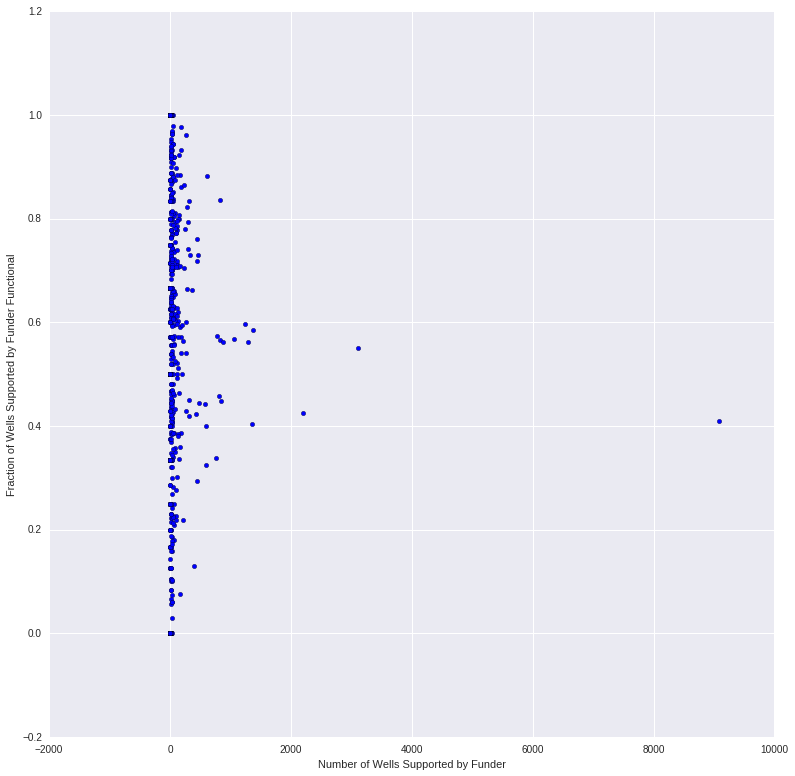

In [89]:
plt.figure(figsize=(13,13))
funder_functional = funder_fractions[funder_fractions.status_group == "functional"]
plt.scatter(funder_functional.OuterCount,funder_functional.Fraction)
plt.xlabel("Number of Wells Supported by Funder")
plt.ylabel("Fraction of Wells Supported by Funder Functional")

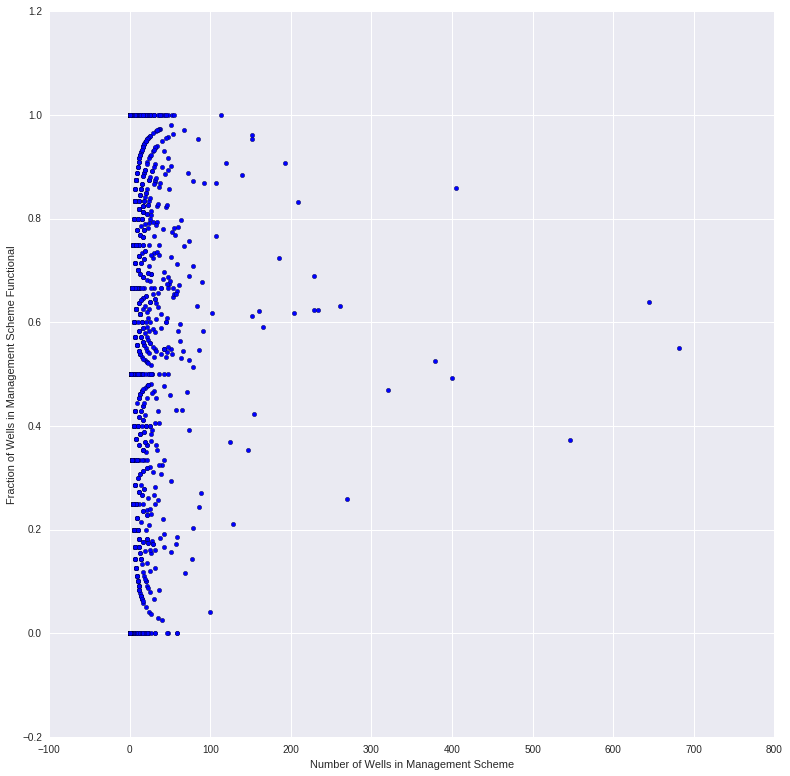

In [90]:
scheme_fractions = groupCountFractionals(train,"status_group",["scheme_name"])

plt.figure(figsize=(13,13))
scheme_functional = scheme_fractions[scheme_fractions.status_group == "functional"]
plt.scatter(scheme_functional.OuterCount,scheme_functional.Fraction)
plt.xlabel("Number of Wells in Management Scheme")
plt.ylabel("Fraction of Wells in Management Scheme Functional")

In [36]:
train = pd.merge(train,scheme_centroids,on=["scheme_name"])
train["distance_from_scheme_centroid"] = np.sqrt(np.abs(train.latitude - train.scheme_mean_latitude)**2 + np.abs(train.longitude - train.scheme_mean_longitude)**2)

In [37]:
functional = train[train.status_group == "functional"]
non_functional = train[train.status_group == "non functional"]
repair = train[train.status_group == "functional needs repair"]

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


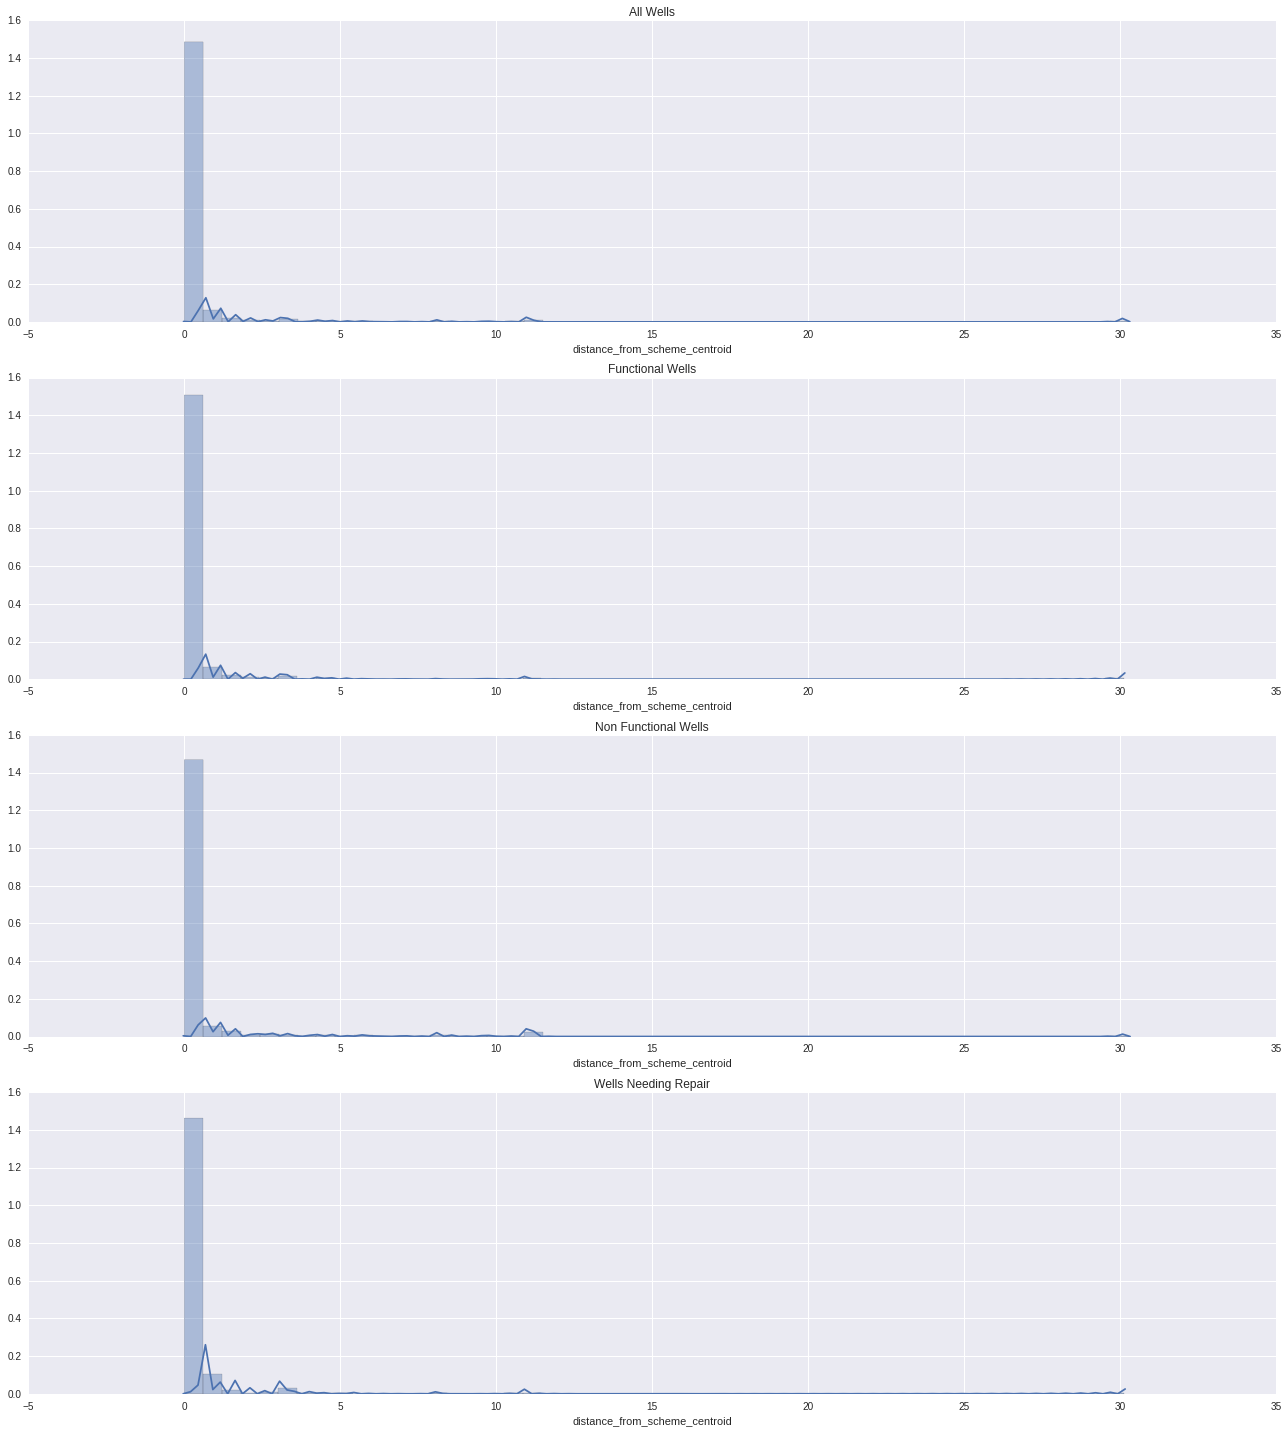

In [44]:
plt.figure(figsize=(18,20))
plt.subplot(411)
sns.distplot(train.distance_from_scheme_centroid)
plt.title("All Wells")
plt.subplot(412)
sns.distplot(functional.distance_from_scheme_centroid)
plt.title("Functional Wells")
plt.subplot(413)
sns.distplot(non_functional.distance_from_scheme_centroid)
plt.title("Non Functional Wells")
plt.subplot(414)
sns.distplot(repair.distance_from_scheme_centroid)
plt.title("Wells Needing Repair")
plt.tight_layout()

In [ ]:
#Difference in elevation from management group mean.

In [12]:
scheme_centroid_heights = train.groupby("scheme_name")["gps_height"].agg(np.mean).reset_index()
scheme_centroid_heights.columns = ["scheme_name","mean_height"]

In [30]:
train_w_ch = pd.merge(train,scheme_centroid_heights,on="scheme_name",how="left")
train_w_ch["ElevationDifferenceFromSchemeCentroid"] = (train_w_ch.gps_height - train_w_ch.mean_height).fillna(0)

In [31]:
functional = train_w_ch[train_w_ch.status_group == "functional"]
non_functional = train_w_ch[train_w_ch.status_group == "non functional"]
repair = train_w_ch[train_w_ch.status_group == "functional needs repair"]

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


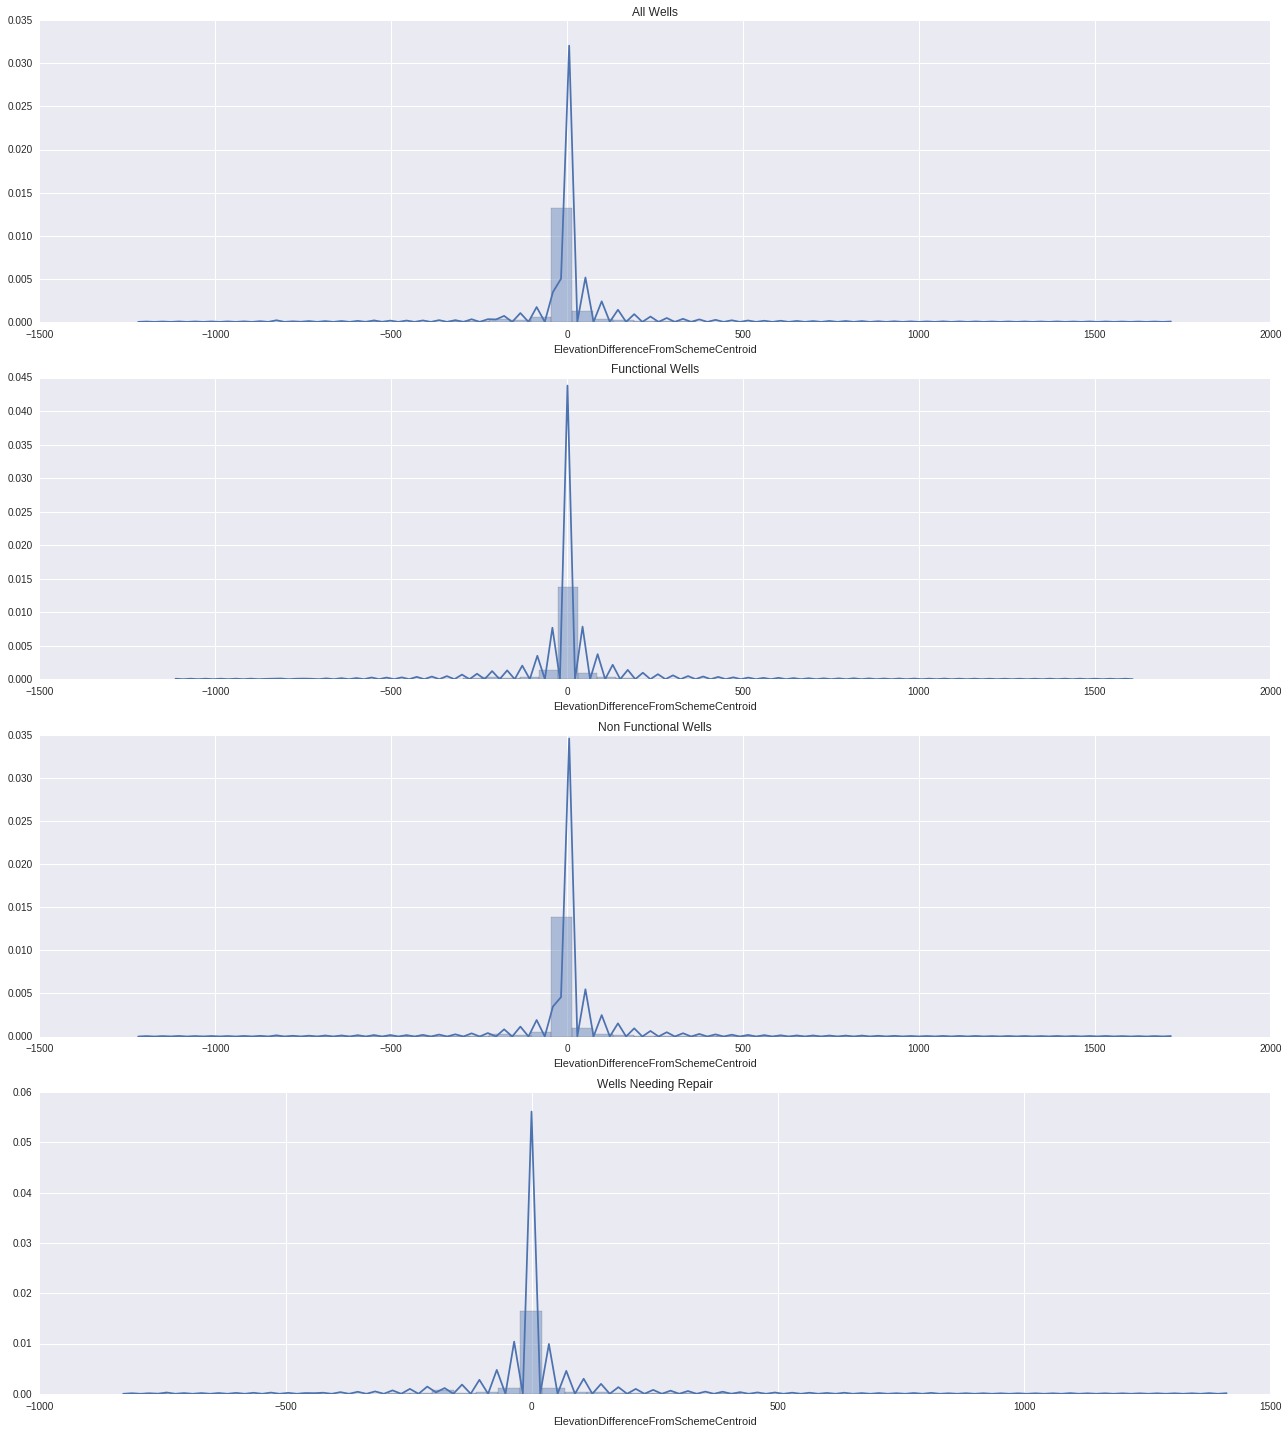

In [32]:
plt.figure(figsize=(18,20))
plt.subplot(411)
sns.distplot(train_w_ch.ElevationDifferenceFromSchemeCentroid)
plt.title("All Wells")
plt.subplot(412)
sns.distplot(functional.ElevationDifferenceFromSchemeCentroid)
plt.title("Functional Wells")
plt.subplot(413)
sns.distplot(non_functional.ElevationDifferenceFromSchemeCentroid)
plt.title("Non Functional Wells")
plt.subplot(414)
sns.distplot(repair.ElevationDifferenceFromSchemeCentroid)
plt.title("Wells Needing Repair")
plt.tight_layout()

In [33]:
np.mean(functional.ElevationDifferenceFromSchemeCentroid),np.mean(non_functional.ElevationDifferenceFromSchemeCentroid),np.mean(repair.ElevationDifferenceFromSchemeCentroid)

(-1.879910003756432, 2.7977000539671657, -0.743731577615877)

In [34]:
train_w_ch.ElevationDifferenceFromSchemeCentroid

0        -57.316547
1          0.000000
2          2.222222
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13        -3.000000
14       -26.434783
15         0.000000
16        71.582375
17        24.582375
18         0.000000
19        34.142857
20        50.437500
21         0.000000
22      -121.417625
23         0.000000
24        30.739130
25        57.472973
26         0.000000
27         0.000000
28        10.909091
29        -3.000000
            ...    
59370      0.000000
59371      0.000000
59372      0.000000
59373      0.000000
59374      0.000000
59375     11.272727
59376      0.000000
59377      0.000000
59378     18.666667
59379   -290.333333
59380     -8.316547
59381      0.000000
59382    164.554404
59383      0.000000
59384      0.000000
59385      0.000000
59386      0.000000
59387   -804.957500
59388      0.000000
